# PREDICTING DIABETES DISEASE  USING MACHING LEARNING


The aim of this project is to use various machine learning models in prediction of diabetes disease in patients.The dataset used consists 22 columns and 253680 rows which was obtained from (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_health_indicators_BRFSS2015.csv). This dataset also contains various features such as HighBP, HighChol, BMI, Stroke ect. these features will be utilized in modelling the algorithms for prediction.

In [1]:
#pip install --upgrade pip

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ------- -------------------------------- 0.4/2.1 MB 8.3 MB/s eta 0:00:01
     ------------------- -------------------- 1.0/2.1 MB 10.9 MB/s eta 0:00:01
     ------------------------------------ --- 1.9/2.1 MB 13.3 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install imblearn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ---------------------------------------- 235.6/235.6 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install keras



  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/2e/f3/19da7511b45e80216cbbd9467137b2d28919c58ba1ccb971435cb631e470/keras-2.13.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ----------------- ---------------------- 0.8/1.7 MB 24.1 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 26.9 MB/s eta 0:00:00


In [4]:
#pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ba/7c/b971f2485155917ecdcebb210e021e36a6b65457394590be01cc61515310/tensorflow-2.13.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/40/fa/98115f6fe4d92e1962f549917be2dc8e369853b7e404191996fedaaf4dd6/tensorflow_intel-2.13.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/126.5 kB ? eta -:--:--
     -------------------------------------- 126.5/126.5 kB 7.8 MB/s eta 0:00:00
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
  Obtaining dependency 

# Importing Libraries

In [1]:
#Importing Libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Importing Libraries for Data Preprocessing
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#import matplotlib.gridspec as gridspec

# Importing ML Model packages
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

# Importing Libraries for measuring accuracy
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef, roc_curve, make_scorer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
import matplotlib.pyplot as plt

#from scikitplot.metrics import cumulative_gain_curve, lift_curve
from sklearn.metrics import precision_recall_curve, roc_curve

2023-08-30 09:43:54.042785: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 09:43:54.456782: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-30 09:43:54.459927: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 09:43:56.961125: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load the data from a CSV file
data = pd.read_csv("https://raw.githubusercontent.com/GraceOluwafemi/Msc-Project/main/diabetes_data.csv")


In [3]:
#To show data summary
data.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [4]:
#To change target vairable name
data = data.rename(columns={'Diabetes_binary': 'Diabetes_Status'})

In [5]:
#To show data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_Status       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
#Converting categorical data from float to interger 
data['Diabetes_Status'] = data['Diabetes_Status'].astype(int)
data['HighBP'] = data['HighBP'].astype(int)
data['HighChol'] = data['HighChol'].astype(int)
data['CholCheck'] = data['CholCheck'].astype(int)
data['Smoker'] = data['Smoker'].astype(int)
data['Stroke'] = data['Stroke'].astype(int)
data['HeartDiseaseorAttack'] = data['HeartDiseaseorAttack'].astype(int)
data['PhysActivity'] = data['PhysActivity'].astype(int)
data['Fruits'] = data['Fruits'].astype(int)
data['Veggies'] = data['Veggies'].astype(int)
data['HvyAlcoholConsump'] = data['HvyAlcoholConsump'].astype(int)
data['AnyHealthcare'] = data['AnyHealthcare'].astype(int)
data['NoDocbcCost'] = data['NoDocbcCost'].astype(int)
data['DiffWalk'] = data['DiffWalk'].astype(int)
data['Sex'] = data['Sex'].astype(int)
data['Age'] = data['Age'].astype(int)
data['Education'] = data['Education'].astype(int)
data['Income'] = data['Income'].astype(int)

print(data.head())

   Diabetes_Status  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0       1         1          1  40.0       1       0   
1                0       0         0          0  25.0       1       0   
2                0       1         1          1  28.0       0       0   
3                0       1         0          1  27.0       0       0   
4                0       1         1          1  24.0       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0      5.0      18.0      15.0         1    0    9     

In [7]:
#To show the statistical analysis of the data
data.describe()

Diabetes_Status         HighBP       HighChol      CholCheck  \
count    253680.000000  253680.000000  253680.000000  253680.000000   
mean          0.139333       0.429001       0.424121       0.962670   
std           0.346294       0.494934       0.494210       0.189571   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000   
25%        24.000000       0.000000       0.000000              0.000000   
50%        27.000000       0.000000       0.000000              0.000000   
75%        31.000000       1.000000       0.000000              0.000000   
max        98.000000       1.000000       1.000000              1.000000   

        PhysActivity         Fruits  ...  AnyHealthcare    NoDocbcCost  \
count  253680.000000  253680.000000  ...  253680.000000  253680.000000   
mean        0.756544       0.634256  ...       0.951053       0.084177   
std         0.429169       0.481639  ...       0.215759       0.277654   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         1.000000       0.000000  ...       1.000000       0.000000   
50%         1.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       0.168224   
std         1.068477       7.412847       8.717951       0.374066   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       2.000000       3.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age      Education         Income  
count  253680.000000  253680.000000  253680.000000  253680.000000  
mean        0.440342       8.032119       5.050434       6.053875  
std         0.496429       3.054220       0.985774       2.071148  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       6.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 22 columns]

In [8]:
data.isna().sum()

Diabetes_Status         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [7]:
data['Diabetes_Status'].value_counts()

Diabetes_Status
0    218334
1     35346
Name: count, dtype: int64

In [8]:
# Creating a copy of the original dataset
EDA_data = data.copy()
print (EDA_data)

        Diabetes_Status  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                     0       1         1          1  40.0       1       0   
1                     0       0         0          0  25.0       1       0   
2                     0       1         1          1  28.0       0       0   
3                     0       1         0          1  27.0       0       0   
4                     0       1         1          1  24.0       0       0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675                0       1         1          1  45.0       0       0   
253676                1       1         1          1  18.0       0       0   
253677                0       0         0          1  28.0       0       0   
253678                0       1         0          1  23.0       0       0   
253679                1       1         1          1  25.0       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHea

In [11]:
#del EDA_data

# Exploratory Data Analysis

### Univariate Analysis

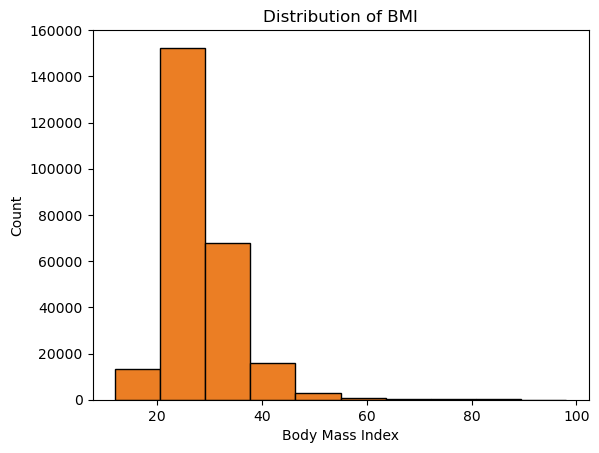

In [12]:
# Generate the histogram
plt.hist(EDA_data['BMI'], bins=10, color= '#eb7e24', edgecolor='black')

# Set plot labels and title
plt.xlabel('Body Mass Index')
plt.ylabel('Count')
plt.title('Distribution of BMI')

# Show the histogram
plt.show()

In [13]:
# Generate the Age histogram
plt.hist(EDA_data['Age'], bins=10, edgecolor='black', color= '#eb7e24', label='Age Distribution')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')

# Add legend
plt.legend()

# Custom age category labels for the legend
legend_labels = {
    1: '1 = 18-24',
    2: '2 = 25-29',
    3: '3 = 30-34',
    4: '4 = 35-39',
    5: '5 = 40-44',
    6: '6 = 45-49',
    7: '7 = 50-54',
    8: '8 = 55-59',
    9: '9 = 60-64',
   10:'10 = 65-69',
   11:'11 = 70-74',
   12:'12 = 75-79',
   13:'13 = 80 and above'
}

# Create a custom legend with the specified labels
handles, labels = plt.gca().get_legend_handles_labels()
custom_legend = [handles[0]]
for key in legend_labels:
    custom_legend.append(plt.Line2D([], [], marker='o', color='w', label=legend_labels[key], markersize=10))

# Position the legend outside the chart area
plt.legend(handles=custom_legend, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the histogram with the legend
plt.show()


### Observation
The visualisation above shows that the data is concentrated heavily within the range of 55 above, indicating that a significant portion of the individuals in the dataset fall within this age band. On the other hand, the age band from 40 below seems to have the least amount of data, indicating a lower representation of individuals in this age range.

In [14]:
# Generate the Age histogram
plt.hist(EDA_data['Income'], bins=10, edgecolor='black', color= '#eb7e24', label='Income Distribution')

# Set plot labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')

# Add legend
plt.legend()

# Custom age category labels for the legend
legend_labels = {
    1: '1 = Less than 10,000',
    2: '2 = 10,000 - 15,000',
    3: '3 = 15,001 - 20,000',
    4: '4 = 20,001 - 25,000',
    5: '5 = 25,001 - 35,000 ',
    6: '6 = 35,001 - 50,000',
    7: '7 = 50,001 - 75,000',
    8: '8 = 75,000 and above'
}

# Create a custom legend with the specified labels
handles, labels = plt.gca().get_legend_handles_labels()
custom_legend = [handles[0]]
for key in legend_labels:
    custom_legend.append(plt.Line2D([], [], marker='o', color='w', label=legend_labels[key], markersize=10))

# Position the legend outside the chart area
plt.legend(handles=custom_legend, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the histogram with the legend
plt.show()


### Observation
There are more high income earners in the data, with majority of the respondents earning above 35,000

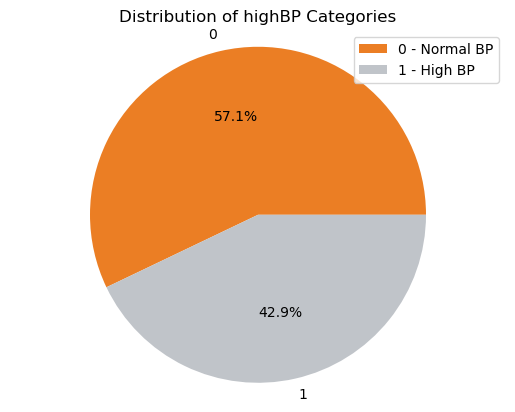

In [15]:
# Count the occurrences of each category
category_counts = EDA_data['HighBP'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['#eb7e24', '#c0c4c9'])

# Add legend
legend_labels = ['0 - Normal BP', '1 - High BP']
plt.legend(legend_labels, loc='best')

# Set title and aspect ratio
plt.title('Distribution of highBP Categories')
plt.axis('equal')

# Display the chart
plt.show()


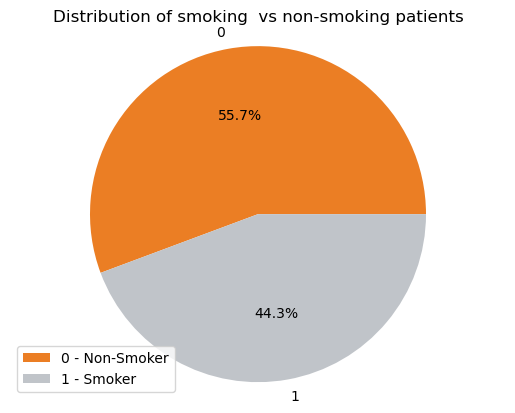

In [16]:
# Count the occurrences of each category
category_counts = EDA_data['Smoker'].value_counts()

# Create a pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=['#eb7e24', '#c0c4c9'])

# Add legend
legend_labels = ['0 - Non-Smoker', '1 - Smoker']
plt.legend(legend_labels, loc='best')

# Set title and aspect ratio
plt.title('Distribution of smoking  vs non-smoking patients')
plt.axis('equal')

# Display the chart
plt.show()

### Bivariate Analysis

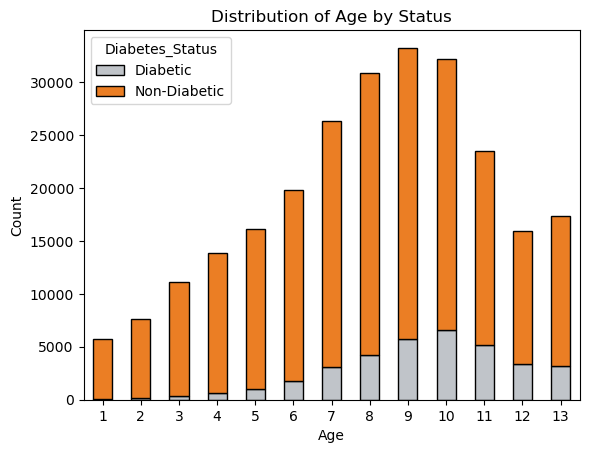

In [17]:
# Map the values to corresponding labels
EDA_data['Diabetes_Status'] = EDA_data['Diabetes_Status'].map({0: 'Non-Diabetic', 1: 'Diabetic'})

# Define colors for 'Diabetes' and 'No_diabetes'
colors = {'Non-Diabetic': '#eb7e24','Diabetic': '#c0c4c9'}

# Group data by status and calculate counts for each age group
grouped_data = EDA_data.groupby('Age')['Diabetes_Status'].value_counts().unstack(fill_value=0)

# Plot the clustered bar chart with specified colors
ax = grouped_data.plot(kind='bar', stacked=True, edgecolor='black', color=[colors.get(x, 'white') for x in grouped_data.columns])

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Status')
plt.xticks(rotation=0)

# Show the chart
plt.legend(title='Diabetes_Status')
plt.show()

### Multivariant Analysis

<Figure size 500x400 with 0 Axes>

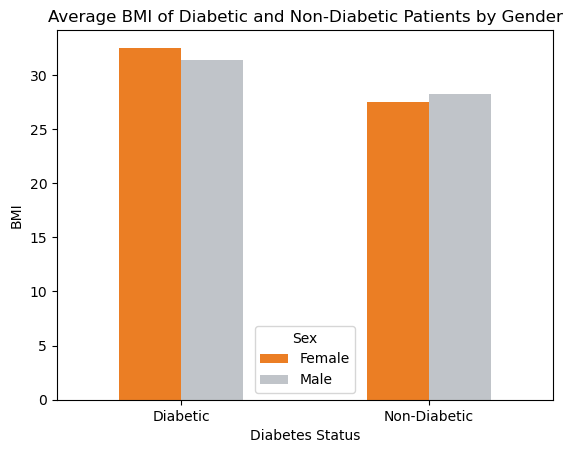

In [18]:
import matplotlib.pyplot as plt

# Map sex values to more understandable labels
#data['Sex'] = data['Sex'].replace({'0': 'Female', '1': 'Male'})

plt.figure(figsize=(5, 4))
ax = EDA_data.groupby(['Diabetes_Status', 'Sex'])['BMI'].mean().unstack().plot(kind='bar', color=['#eb7e24', '#c0c4c9'])
plt.title('Average BMI of Diabetic and Non-Diabetic Patients by Gender')
plt.xlabel('Diabetes Status')
plt.ylabel('BMI')
plt.xticks(rotation=0)

# Create a custom legend
handles, labels = ax.get_legend_handles_labels()
custom_labels = {'0': 'Female', '1': 'Male'}
new_labels = [custom_labels[label] for label in labels]
ax.legend(handles, new_labels, title='Sex')

plt.show()


## Target Class Analysis

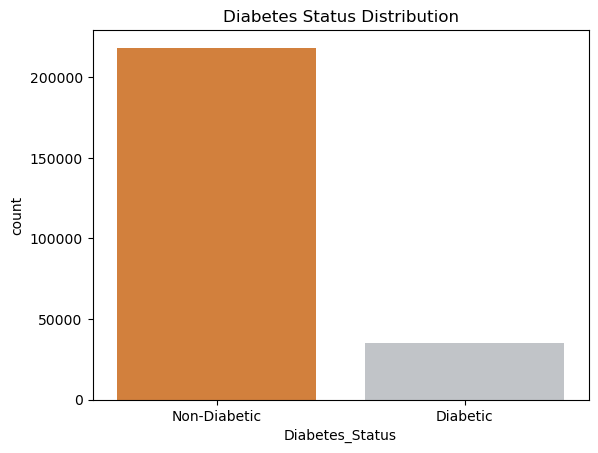

In [19]:
# Class distribution
sns.countplot(x='Diabetes_Status', data=EDA_data,  palette=['#eb7e24', '#c0c4c9'])
plt.title('Diabetes Status Distribution')
plt.show()

## Handling Outliers

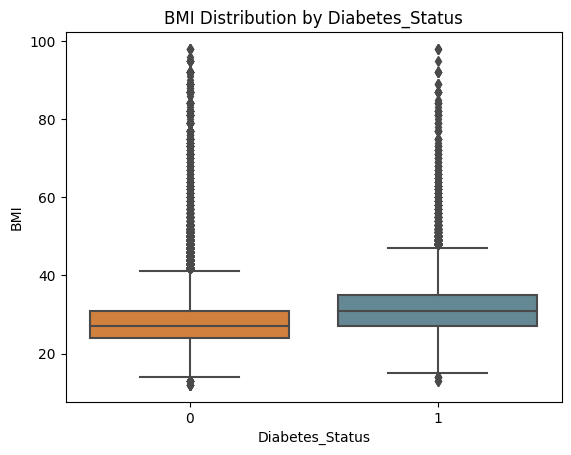

In [9]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='BMI', data=data, palette=['#eb7e24', '#5c8c9c'])
plt.title('BMI Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('BMI')

# Display the plot
plt.show()


In [10]:

# Replace values in the 'BMI' column with mean value of 28.4 where 'Diabetes_Status' is equal to 0 and 'BMI' is greater than 39
data.loc[(data["Diabetes_Status"] == 0) & (data["BMI"] > 39), 'BMI'] = 28.4

# Replace values in the 'BMI' column with mean value of 28.4 where 'Diabetes_Status' is equal to 0 and 'BMI' is less than 10
data.loc[(data["Diabetes_Status"] == 0) & (data["BMI"] < 15), 'BMI'] = 28.4

# Replace values in the 'BMI' column with mean value of 28.4 where 'Diabetes_Status' is equal to 0 and 'BMI' is greater than 43
data.loc[(data["Diabetes_Status"] == 1) & (data["BMI"] > 43), 'BMI'] = 28.4

# Replace values in the 'BMI' column with mean value of 28.4 where 'Diabetes_Status' is equal to 0 and 'BMI' is less than 17
data.loc[(data["Diabetes_Status"] == 1) & (data["BMI"] < 17), 'BMI'] = 28.4


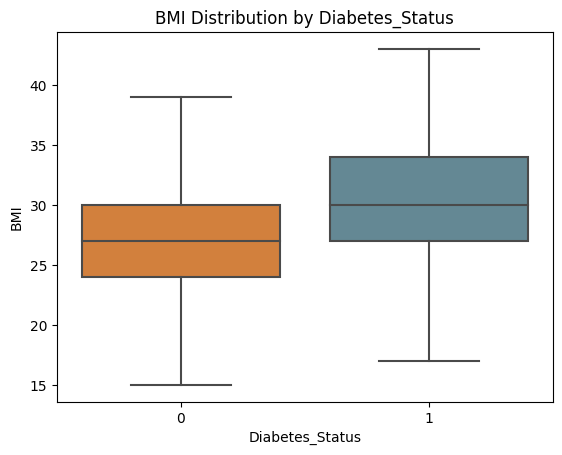

In [11]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='BMI', data=data, palette=['#eb7e24', '#5c8c9c'])
plt.title('BMI Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('BMI')

# Display the plot
plt.show()


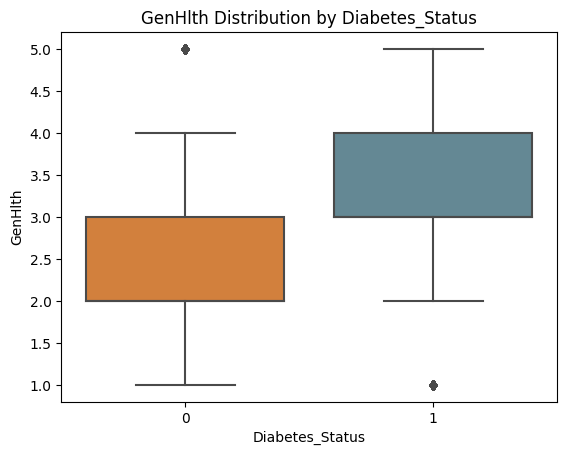

In [12]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='GenHlth', data=data, palette=['#eb7e24', '#5c8c9c'])
plt.title('GenHlth Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('GenHlth')

# Display the plot
plt.show()

In [13]:
# Replace values in the 'GenHlth' column with mean value of 2.5 where 'Diabetes_Status' is equal to 0 and 'GenHlth' is greater than 4
data.loc[(data["Diabetes_Status"] == 0) & (data["GenHlth"] > 4), 'GenHlth'] = 2.5

# Replace values in the 'GenHlth' column with mean value of 2.5 where 'Diabetes_Status' is equal to 0 and 'GenHlth' is less than 1.5
data.loc[(data["Diabetes_Status"] == 1) & (data["GenHlth"] < 1.5), 'GenHlth'] = 2.5

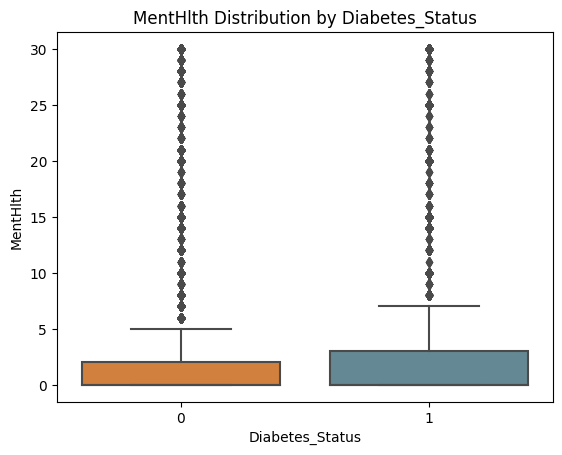

In [14]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='MentHlth', data=data, palette=['#eb7e24', '#5c8c9c'])
plt.title('MentHlth Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('MentHlth')

# Display the plot
plt.show()

In [15]:
# Replace values in the 'MentHlth' column with mean value of 3.2 where 'Diabetes_Status' is equal to 0 and 'MentHlth' is greater than 4
data.loc[(data["Diabetes_Status"] == 0) & (data["MentHlth"] > 5), 'MentHlth'] = 3.2

# Replace values in the 'MentHlth' column with mean value of 3.2 where 'Diabetes_Status' is equal to 1 and 'MentHlth' is greater than 6
data.loc[(data["Diabetes_Status"] == 1) & (data["MentHlth"] > 6), 'MentHlth'] = 3.2

In [16]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='PhysHlth', data=data, palette=['#eb7e24', '#5c8c9c'])
plt.title('PhysHlth Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('PhysHlth')

# Display the plot
plt.show()

In [17]:
# Replace values in the 'PhysHlth' column with mean value of 4.4 where 'Diabetes_Status' is equal to 0 and 'PhysHlth' is greater than 5
data.loc[(data["Diabetes_Status"] == 0) & (data["PhysHlth"] > 5), 'PhysHlth'] = 4.4

In [18]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='Age', data=data, palette=['#eb7e24', '#5c8c9c'])
plt.title('Age Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('Age')

# Display the plot
plt.show()

In [19]:
# Replace values in the 'Age' column with mean value of 8 where 'Diabetes_Status' is equal to 1 and 'Age' is less than 4
data.loc[(data["Diabetes_Status"] == 1) & (data["Age"] < 4), 'Age'] = 8

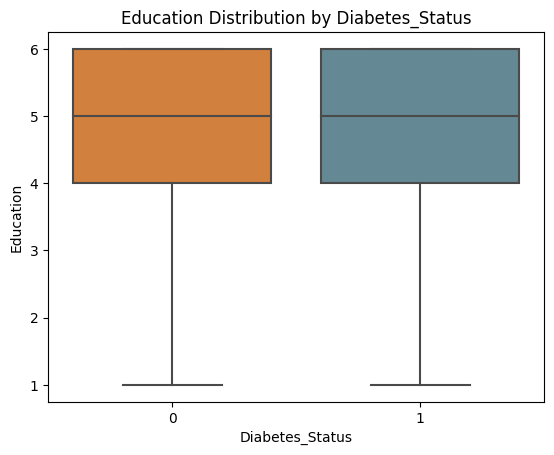

In [20]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='Education', data=data, palette=['#eb7e24', '#5c8c9c'] )
plt.title('Education Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('Education')

# Display the plot
plt.show()

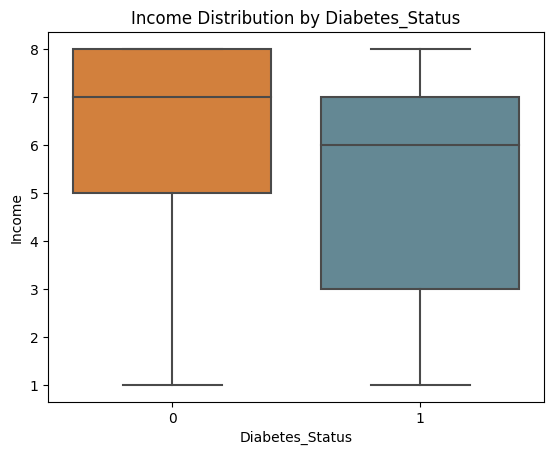

In [21]:
# Create a boxplot
sns.boxplot(x='Diabetes_Status', y='Income', data=data, palette=['#eb7e24', '#5c8c9c'])
plt.title('Income Distribution by Diabetes_Status')
plt.xlabel('Diabetes_Status')
plt.ylabel('Income')

# Display the plot
plt.show()

In [22]:
# Creating a copy of the original dataset
new_data = data.copy()

## Feature Selection Using Multi-criteria decision making

In [23]:
y = new_data.Diabetes_Status
x = new_data.drop(["Diabetes_Status"],axis = 1)
columns = x.columns.tolist()

In [24]:
# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Display the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())


Class distribution after oversampling:
Diabetes_Status
0    218334
1    218334
Name: count, dtype: int64


In [25]:
# The feature names are given as a list
feature_names = ['HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Veggies',
                 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'HighBP',
                 'BMI', 'Smoker', 'Fruits', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Normalizing the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_resampled)

# Defining the evaluation criteria and corresponding weights
weights = [0.2, 0.5,0.3]

# Defining the classifier
classifier = LogisticRegression()


# Calculate the evaluation scores (roc_auc, precision, f1) using cross-validation
def evaluate_features(X, y_resampled, classifier):
    scores = []
    scoring = ['roc_auc', 'precision', 'f1']

    for feature in range(X.shape[1]):
        X_feature = X[:, feature].reshape(-1, 1)
        score = [np.mean(cross_val_score(classifier, X_feature, y_resampled, cv=5, scoring=scoring[i])) for i in range(len(scoring))]
        scores.append(score)

    return np.array(scores)

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, y_resampled, test_size=0.3, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X_normalized, y_resampled, test_size=0.3, random_state=42)

# Calculate the evaluation scores for each feature on the training set
evaluation_scores_train = evaluate_features(X_train, Y_train, classifier)

# Calculate the weighted sum for each feature
weighted_sums_train = np.dot(evaluation_scores_train, weights)

# Sort the features based on the weighted sum
ranked_features_indices = np.argsort(weighted_sums_train)[::-1]
ranked_features = [feature_names[idx] for idx in ranked_features_indices]
ranks = np.arange(1, len(ranked_features) + 1)

# Create a DataFrame to store the ranked features and their corresponding scores
ranked_features_df = pd.DataFrame({'Feature': ranked_features, 'Score': weighted_sums_train})


# Sort the DataFrame based on the Score column in descending order
ranked_features_df = ranked_features_df.sort_values(by='Score', ascending=False)

# Display the ranked features with their corresponding scores and ranks
print("Ranked features:")
print(ranked_features_df.to_string(index=False))



Ranked features:
             Feature    Score
                 BMI 0.704471
              Smoker 0.655869
       AnyHealthcare 0.638685
           CholCheck 0.622026
             Veggies 0.617923
              Fruits 0.610958
            PhysHlth 0.610240
            HighChol 0.601972
              HighBP 0.598393
        PhysActivity 0.571301
           Education 0.570929
         NoDocbcCost 0.566352
HeartDiseaseorAttack 0.559608
              Stroke 0.558033
            MentHlth 0.553369
   HvyAlcoholConsump 0.540225
              Income 0.519807
             GenHlth 0.488049
            DiffWalk 0.482537
                 Sex 0.413122
                 Age 0.378787


In [57]:
#del new_data1

In [26]:
# Create a new DataFrame with the output
new_data1 = new_data.copy()

In [27]:
# Drop columns from the DataFrame
columns_to_drop = ['HvyAlcoholConsump','Income','GenHlth','DiffWalk','Sex','Age']
#columns_to_drop = ['HighBP','PhysActivity','Fruits','NoDocbcCost','HeartDiseaseorAttack','Stroke','HighChol','HvyAlcoholConsump','Income','GenHlth','DiffWalk','Sex',
#'Age','Veggies','CholCheck','AnyHealthcare','Smoker']
new_data1 = new_data1.drop(columns=columns_to_drop, axis=1)

In [28]:
# 'new_data1' now contains the DataFrame with the specified columns dropped
new_data1.head()

Diabetes_Status  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0       1         1          1  28.4       1       0   
1                0       0         0          0  25.0       1       0   
2                0       1         1          1  28.0       0       0   
3                0       1         0          1  27.0       0       0   
4                0       1         1          1  24.0       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  AnyHealthcare  \
0                     0             0       0        1              1   
1                     0             1       0        0              0   
2                     0             0       1        0              1   
3                     0             1       1        1              1   
4                     0             1       1        1              1   

   NoDocbcCost  MentHlth  PhysHlth  Education  
0            0       3.2       4.4          4  
1            1       0.0       0.0          6  
2            1       3.2       4.4          4  
3            0       0.0       0.0          3  
4            0       3.0       0.0          5

In [30]:
y_over = new_data1.Diabetes_Status
X_over = new_data1.drop(["Diabetes_Status"],axis = 1)
columns = X_over.columns.tolist()

In [31]:
random_seed = 42

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=random_seed)
X_over, y_over = smote.fit_resample(X_over, y_over)

# Display the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_over).value_counts())


Class distribution after oversampling:
Diabetes_Status
0    218334
1    218334
Name: count, dtype: int64


In [32]:
X_train_over1, X_test_over1, Y_train_over1, Y_test_over1 = train_test_split(X_over ,y_over , test_size = 0.3, random_state = 42)

In [33]:
# Normalize the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_over1 = scaler.fit_transform(X_train_over1)
X_test_over1 = scaler.transform(X_test_over1)

# Hyper-Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Define the parameter grids for each classifier
lr_params = {'C': [0.1, 1, 10]}
xgb_params = {'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5],'learning_rate': [0.01, 0.1, 0.2]}
vc_params = {'voting': [ 'soft']}

# Initialize classifiers
lr = LogisticRegression()
xgb_classifier = xgb.XGBClassifier()
vc = VotingClassifier(estimators=[('lr', lr), ('xgb', xgb_classifier)], voting='soft')

# Perform grid search with cross-validation for Logistic Regression
lr_gs = GridSearchCV(lr, lr_params, cv=5, n_jobs=-1, scoring='precision')
lr_gs.fit(X_train_over1, Y_train_over1)

# Perform grid search with cross-validation for XGBoost
xgb_gs = GridSearchCV(xgb_classifier, xgb_params, cv=5, n_jobs=-1, scoring='precision' )
xgb_gs.fit(X_train_over1, Y_train_over1)

# Perform grid search with cross-validation for the Voting Classifier
vc_gs = GridSearchCV(vc, vc_params, cv=5, n_jobs=-1)
vc_gs.fit(X_train_over1, Y_train_over1)

# Get the best parameters and best score for each model
best_lr_params = lr_gs.best_params_
best_lr_score = lr_gs.best_score_

best_xgb_params = xgb_gs.best_params_
best_xgb_score = xgb_gs.best_score_

best_vc_params = vc_gs.best_params_
best_vc_score = vc_gs.best_score_

# Print the best parameters and scores for each model
print("Best Logistic Regression Parameters:", best_lr_params)
print("Best Logistic Regression Score:", best_lr_score)

print("Best XGBoost Parameters:", best_xgb_params)
print("Best XGBoost Score:", best_xgb_score)

print("Best Voting Classifier Parameters:", best_vc_params)
print("Best Voting Classifier Score:", best_vc_score)


Best Logistic Regression Parameters: {'C': 0.1}
Best Logistic Regression Score: 0.7028498322473735
Best XGBoost Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Best XGBoost Score: 0.7122064175583054
Best Voting Classifier Parameters: {'voting': 'soft'}
Best Voting Classifier Score: 0.7113689065312212


# Algorithm Modelling

In [34]:
# Create Logistics Regression classifier
lg = LogisticRegression(solver='liblinear', C= 0.1)

# Train the classifier
lg.fit(X_train_over1, Y_train_over1)

# Make predictions on the testing set
y_pred_lgover = lg.predict(X_test_over1)

y_pred_lgover1 = lg.predict_proba(X_test_over1)[:, 1]
fpr_lgover, tpr_lgover, thresholds_lgover = roc_curve(Y_test_over1, y_pred_lgover1)
auc_lgover = roc_auc_score(Y_test_over1, y_pred_lgover1)

In [35]:
# Evaluate the model
print('Accuracy:', accuracy_score(Y_test_over1, y_pred_lgover))
print('Precision:', precision_score(Y_test_over1, y_pred_lgover))
print('Recall:', recall_score(Y_test_over1, y_pred_lgover))
print('AUC:', auc_lgover)
print('Confusion Matrix:')
print(confusion_matrix(Y_test_over1, y_pred_lgover))

Accuracy: 0.7396890100075572
Precision: 0.7535391493083676
Recall: 0.7112694359930894
AUC: 0.8278202256464384
Confusion Matrix:
[[50378 15216]
 [18885 46522]]


In [36]:
# Classification report
class_report = classification_report(Y_test_over1, y_pred_lgover)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75     65594
           1       0.75      0.71      0.73     65407

    accuracy                           0.74    131001
   macro avg       0.74      0.74      0.74    131001
weighted avg       0.74      0.74      0.74    131001



In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Create Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train_over1, Y_train_over1)

# Make predictions on the testing set
y_pred_nbover = nb.predict(X_test_over1)

y_pred_nbover1 = nb.predict_proba(X_test_over1)[:, 1]
fpr_nbover, tpr_nbover, thresholds_nbover = roc_curve(Y_test_over1, y_pred_nbover1)
auc_nbover = roc_auc_score(Y_test_over1, y_pred_nbover1)



In [38]:
# Evaluate the model
print('Accuracy:', accuracy_score(Y_test_over1, y_pred_nbover))
print('Precision:', precision_score(Y_test_over1, y_pred_nbover))
print('Recall:', recall_score(Y_test_over1, y_pred_nbover))
print('f1:', f1_score(Y_test_over1, y_pred_nbover))
print('AUC:', auc_nbover)
print('Confusion Matrix:')
print(confusion_matrix(Y_test_over1, y_pred_nbover))


Accuracy: 0.7119945649269853
Precision: 0.7495851969412783
Recall: 0.6354518629504488
f1: 0.6878159778246659
AUC: 0.8047180741941716
Confusion Matrix:
[[51709 13885]
 [23844 41563]]


In [40]:
# Classification report
class_report = classification_report(Y_test_over1, y_pred_nbover)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.79      0.73     65594
           1       0.75      0.64      0.69     65407

    accuracy                           0.71    131001
   macro avg       0.72      0.71      0.71    131001
weighted avg       0.72      0.71      0.71    131001



In [41]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

# Create XGBoost classifier
XGBClassifier = xgb.XGBClassifier( n_estimators= 300, max_depth= 5 ,learning_rate = 0.2)

# Train the classifier
XGBClassifier.fit(X_train_over1, Y_train_over1)

# Make predictions on the testing set
y_pred_xgb = XGBClassifier.predict(X_test_over1)

# Get predicted probabilities for positive class
y_pred_proba_xgb = XGBClassifier.predict_proba(X_test_over1)[:, 1]


# Evaluate the model
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_test_over1, y_pred_proba_xgb)
accuracy = accuracy_score(Y_test_over1, y_pred_xgb)
confusion_mat = confusion_matrix(Y_test_over1, y_pred_xgb)
auc_xgb = roc_auc_score(Y_test_over1, y_pred_proba_xgb)


In [42]:
# Evaluate the model
print('Accuracy:', accuracy_score(Y_test_over1, y_pred_xgb))
print('Precision:', precision_score(Y_test_over1, y_pred_xgb))
print('Recall:', recall_score(Y_test_over1, y_pred_xgb))
print('f1:', f1_score(Y_test_over1, y_pred_xgb))
print('AUC:', auc_xgb)
print('Confusion Matrix:')
print(confusion_matrix(Y_test_over1, y_pred_xgb))

Accuracy: 0.8251311058694208
Precision: 0.8424742533885603
Recall: 0.7991958047303805
f1: 0.8202645660395124
AUC: 0.9181194677175575
Confusion Matrix:
[[55820  9774]
 [13134 52273]]


In [43]:
# Classification report
class_report = classification_report(Y_test_over1, y_pred_xgb)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83     65594
           1       0.84      0.80      0.82     65407

    accuracy                           0.83    131001
   macro avg       0.83      0.83      0.83    131001
weighted avg       0.83      0.83      0.83    131001



## Long Short Term Memory Networks (LSTMs)

In [44]:
time_steps = 1  # Each sample represents one time step

# Reshape the data for LSTM input
X_train_lstm = np.reshape(X_train_over1, (X_train_over1.shape[0], time_steps, X_train_over1.shape[1]))
X_test_lstm = np.reshape(X_test_over1, (X_test_over1.shape[0], time_steps, X_test_over1.shape[1]))

# Build the LSTM model
lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(time_steps, X_train_over1.shape[1])),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with additional metrics
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=[
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.AUC(),  # AUC requires predicted probabilities
])

# Train the model
lstm.fit(X_train_lstm, Y_train_over1, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, precision, recall, auc = lstm.evaluate(X_test_lstm, Y_test_over1)
print(f'Test loss: {loss:.4f}, Test precision: {precision:.4f}, Test recall: {recall:.4f}, Test AUC: {auc:.4f}')


Epoch 1/10
7642/7642 [==============================] - 52s 6ms/step - loss: 0.4816 - precision: 0.7620 - recall: 0.7275 - auc: 0.8382 - val_loss: 0.4628 - val_precision: 0.7442 - val_recall: 0.8020 - val_auc: 0.8555
Epoch 2/10
7642/7642 [==============================] - 55s 7ms/step - loss: 0.4535 - precision: 0.7847 - recall: 0.7417 - auc: 0.8577 - val_loss: 0.4495 - val_precision: 0.7694 - val_recall: 0.7737 - val_auc: 0.8616
Epoch 3/10
7642/7642 [==============================] - 56s 7ms/step - loss: 0.4475 - precision: 0.7875 - recall: 0.7444 - auc: 0.8616 - val_loss: 0.4455 - val_precision: 0.7703 - val_recall: 0.7786 - val_auc: 0.8645
Epoch 4/10
7642/7642 [==============================] - 47s 6ms/step - loss: 0.4435 - precision: 0.7889 - recall: 0.7496 - auc: 0.8644 - val_loss: 0.4405 - val_precision: 0.8011 - val_recall: 0.7327 - val_auc: 0.8670
Epoch 5/10
7642/7642 [==============================] - 46s 6ms/step - loss: 0.4402 - precision: 0.7894 - recall: 0.7548 - auc: 0.86

In [45]:
# Make predictions using the LSTM model
lstm_predictions = lstm.predict(X_test_lstm)

# Extract the predicted probabilities for class 1
lstm_probs = lstm_predictions[:, 0] 

# Assuming Y_test_over1 contains the true labels
true_labels = Y_test_over1 

# Calculate FPR and TPR
fpr_lstm, tpr_lstm, _ = roc_curve(true_labels, lstm_probs)
 
# Calculate the AUC (Area Under the Curve) for the LSTM model
auc_lstm = roc_auc_score(true_labels, lstm_probs)

4094/4094 [==============================] - 14s 3ms/step


In [46]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y_pred_proba_xgb[Y_test_over1 == 0], label='Non-diabetic', color='gray')
sns.kdeplot(y_pred_proba_xgb[Y_test_over1 == 1], label='Diabetic', color='orange')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Probability Distribution by True Class')
plt.legend()
plt.show()


In [47]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(Y_test_over1, y_pred_proba_xgb, n_bins=10, strategy='uniform')

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.legend(loc='best')
plt.show()


In [48]:
# Plot ROC AUC curves for Logistic Regression, Naive Bayes, and XGBoost
plt.figure(figsize=(7, 5))

# Plot Logistic Regression ROC curve
plt.plot(fpr_lgover, tpr_lgover, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lgover:.2f})')

# Plot Naive Bayes ROC curve
plt.plot(fpr_nbover, tpr_nbover, color='Red', lw=2, label=f'Naive Bayes (AUC = {auc_nbover:.2f})')

# Plot XGBoost ROC curve
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (AUC = {auc_xgb:.2f})')

# Plot LSTMs ROC curve
plt.plot(fpr_lstm, tpr_lstm, color='yellow', lw=2, label=f'LSTMs (AUC = {auc_lstm:.2f})')




# Plot random line for reference
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [49]:
# Calculate confusion matrix
confusion_mat = confusion_matrix(Y_test_over1, y_pred_xgb)
tn, fp, fn, tp = confusion_mat.ravel()

# Calculate False Alarm Rate (FAR)
false_alarm_rate = fp / (fp + tn)

# Print metrics
print('False Alarm Rate:', false_alarm_rate)

False Alarm Rate: 0.149007531176632


In [50]:

colors = ['#00A36C', '#0047AB', '#088F8F'] #Update colors here ['#865DFF', '#FFC6D3']#Replace with'#00A36C',#0047AB','#088F8F'

# Calculate confusion matrix
# Compute classification report
report = classification_report(Y_test_over1, y_pred_xgb, output_dict=True)
precision = report['1']['precision']
recall = report['1']['recall']
f1 = report['1']['f1-score']

# Create a bar chart
labels = ['Precision', 'Recall', 'F1-score']
scores = [precision, recall, f1]
x = np.arange(len(labels))

# Increase size of chart
plt.figure(figsize=(8, 6))

plt.bar(x, scores, color=colors)
plt.xticks(x, labels)
plt.ylabel('Scores')
plt.title('XGBoost Model Performance using Under-Sampling')
plt.show()


In [51]:
import pickle
pickle.dump(XGBClassifier, open('model.pkl','wb'))

#model = pickle.load(open('model.pkl','rb'))
#print(model.predict([[1,1,1,22,1,1,1,1,1,1,1,4,5,9,3]]))

In [159]:
# Loading model to compare the results DROP
model = pickle.load(open('model.pkl','rb'))

result = model.predict([[1,1,1,22,1,1,1,1,1,1,1,4,5,9,3]])
if result == 1:
    print("The patient has Diabetes")
else:
    print("The patient does not have Diabetes)")



The patient has Diabetes
